<a href="https://colab.research.google.com/github/AbdiD21/Abdi/blob/main/yes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from math import sqrt
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sub  = pd.read_csv('SampleSubmission.csv')

In [ ]:
train.shape, test.shape, sub.shape

((30557, 82), (16136, 77), (16136, 2))

In [ ]:
train.head(2)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.0,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.000000,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.00005,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652


In [ ]:
test.head(2)

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000046,6156.074219,0.000007,0.113310,227.467539,0.032071,68.099367,1.445658,-95.984984,22.942019,0.017953,841.142869,155.982981,835625.785337,32.709708,1.898112,-95.987015,22.950150,0.000073,0.032071,68.099367,1.445658,-95.984984,22.942019,0.000088,1.494039,2592.634167,74028.429228,0.032268,6.317523,2593.137433,74023.930722,68.099367,1.445658,-95.984984,22.942019,0.299053,0.466173,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000221,0.784436,0.000184,-0.140458,0.032071,68.099367,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000045,7311.869141,0.000005,0.110397,227.788713,0.044784,75.936845,34.639165,-95.017596,18.539491,0.019576,1187.570320,922.385833,835225.278332,73.808143,34.720869,-95.017095,18.548551,0.000048,0.040803,75.936813,34.641758,-95.014908,18.539116,0.000074,1.534485,7334.601102,48466.653300,0.046211,8.308433,7902.937546,46345.613031,75.936845,34.639165,-95.017596,18.539491,0.290397,-0.213657,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000034,0.678988,0.000014,-0.842713,0.040803,75.936813,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sub.head(2)

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,0
1,0OS9LVX X 2020-01-03,0


In [ ]:
train.isnull().sum()

,0
Place_ID X Date,0
Date,0
Place_ID,0
target,0
target_min,0
target_max,0
target_variance,0
target_count,0
precipitable_water_entire_atmosphere,0
relative_humidity_2m_above_ground,0


In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['Dayofweek'] = train['Date'].dt.dayofweek
train['DayOfyear'] = train['Date'].dt.dayofyear
# Use isocalendar().week to get the week of the year
train['WeekOfyear'] = train['Date'].dt.isocalendar().week

test['Date'] = pd.to_datetime(test['Date'])
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day
test['Dayofweek'] = test['Date'].dt.dayofweek
test['DayOfyear'] = test['Date'].dt.dayofyear
# Use isocalendar().week to get the week of the year
test['WeekOfyear'] = test['Date'].dt.isocalendar().week

In [ ]:
train.head(2)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,Month,Day,Dayofweek,DayOfyear,WeekOfyear
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.0,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.000000,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118,1,2,3,2,1
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.00005,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652,1,3,4,3,1


In [ ]:
train.drop(['Place_ID X Date','Date','Place_ID','target_min','target_max','target_variance','target_count'], axis=1, inplace=True)
test.drop(['Place_ID X Date','Date','Place_ID'], axis=1, inplace=True)

In [ ]:
train.shape, test.shape

((30557, 80), (16136, 79))

In [ ]:
train = train.fillna(0)
test = test.fillna(0)

In [ ]:
lag_features = ['relative_humidity_2m_above_ground',
                'v_component_of_wind_10m_above_ground',
                'L3_CLOUD_surface_albedo',
                'L3_CO_CO_column_number_density',
                'temperature_2m_above_ground',
                'L3_CLOUD_cloud_optical_depth',
                'L3_O3_O3_column_number_density'
                ]

for feat in lag_features:
    for i in range(3):
        train[feat+'_lag'+str(i+1)] = train[feat].shift(i+1)
        test[feat+'_lag'+str(i+1)] = test[feat].shift(i+1)

In [ ]:
X = train.drop(labels=['target'], axis=1)
y = train['target'].values

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((22917, 100), (22917,), (7640, 100), (7640,))

In [ ]:
X.head(5)

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,Month,Day,Dayofweek,DayOfyear,WeekOfyear,relative_humidity_2m_above_ground_lag1,relative_humidity_2m_above_ground_lag2,relative_humidity_2m_above_ground_lag3,v_component_of_wind_10m_above_ground_lag1,v_component_of_wind_10m_above_ground_lag2,v_component_of_wind_10m_above_ground_lag3,L3_CLOUD_surface_albedo_lag1,L3_CLOUD_surface_albedo_lag2,L3_CLOUD_surface_albedo_lag3,L3_CO_CO_column_number_density_lag1,L3_CO_CO_column_number_density_lag2,L3_CO_CO_column_number_density_lag3,temperature_2m_above_ground_lag1,temperature_2m_above_ground_lag2,temperature_2m_above_ground_lag3,L3_CLOUD_cloud_optical_depth_lag1,L3_CLOUD_cloud_optical_depth_lag2,L3_CLOUD_cloud_optical_depth_lag3,L3_O3_O3_column_number_density_lag1,L3_O3_O3_column_number_density_lag2,L3_O3_O3_column_number_density_lag3
0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000000,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118,1,2,3,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.0000

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_valid, label=y_valid)

param = {'objective': 'regression',
         'boosting': 'gbdt',
         'metric': 'rmse',
         'learning_rate': 0.05,
         'num_iterations': 7500,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction': 0.8,
         'bagging_freq': 1,
         'feature_fraction': 0.8
         }

# Pass the 'early_stopping_rounds' argument within the lgb.callback.early_stopping() callback
clf = lgb.train(params=param,
                train_set=train_data,
                valid_sets=[test_data],
                valid_names=['test_data'], # Name the validation set
                callbacks=[lgb.log_evaluation(500),
                           lgb.callback.early_stopping(stopping_rounds=100)])  # Early stopping after 100 rounds without improvement

y_pred = clf.predict(X_valid)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24379
[LightGBM] [Info] Number of data points in the train set: 22917, number of used features: 100
[LightGBM] [Info] Start training from score 61.145717
Training until validation scores don't improve for 100 rounds
[500]	test_data's rmse: 25.7761
[1000]	test_data's rmse: 24.9839
[1500]	test_data's rmse: 24.6322
[2000]	test_data's rmse: 24.4514
[2500]	test_data's rmse: 24.3414
[3000]	test_data's rmse: 24.272
[3500]	test_data's rmse: 24.2223
[4000]	test_data's rmse: 24.1879
[4500]	test_data's rmse: 24.1593
[5000]	test_data's rmse: 24.1486
[5500]	test_data's rmse: 24.1343
[6000]	test_data's rmse: 24.1224
[6500]	test_data's rmse: 24.115
[7000]	test_data's rmse: 24.111
[7500]	test_data's rmse: 24.1064
Did not meet early stopping. Best iteration is:
[7500]	test_data's rmse: 24.1064


In [ ]:
y_pred

array([53.45275621, 64.68674329, 69.8748122 , ..., 55.55433012,
       69.07945852, 41.17336184])

In [ ]:
np.sqrt(mean_squared_error(y_valid, y_pred))

np.float64(24.10642828083089)

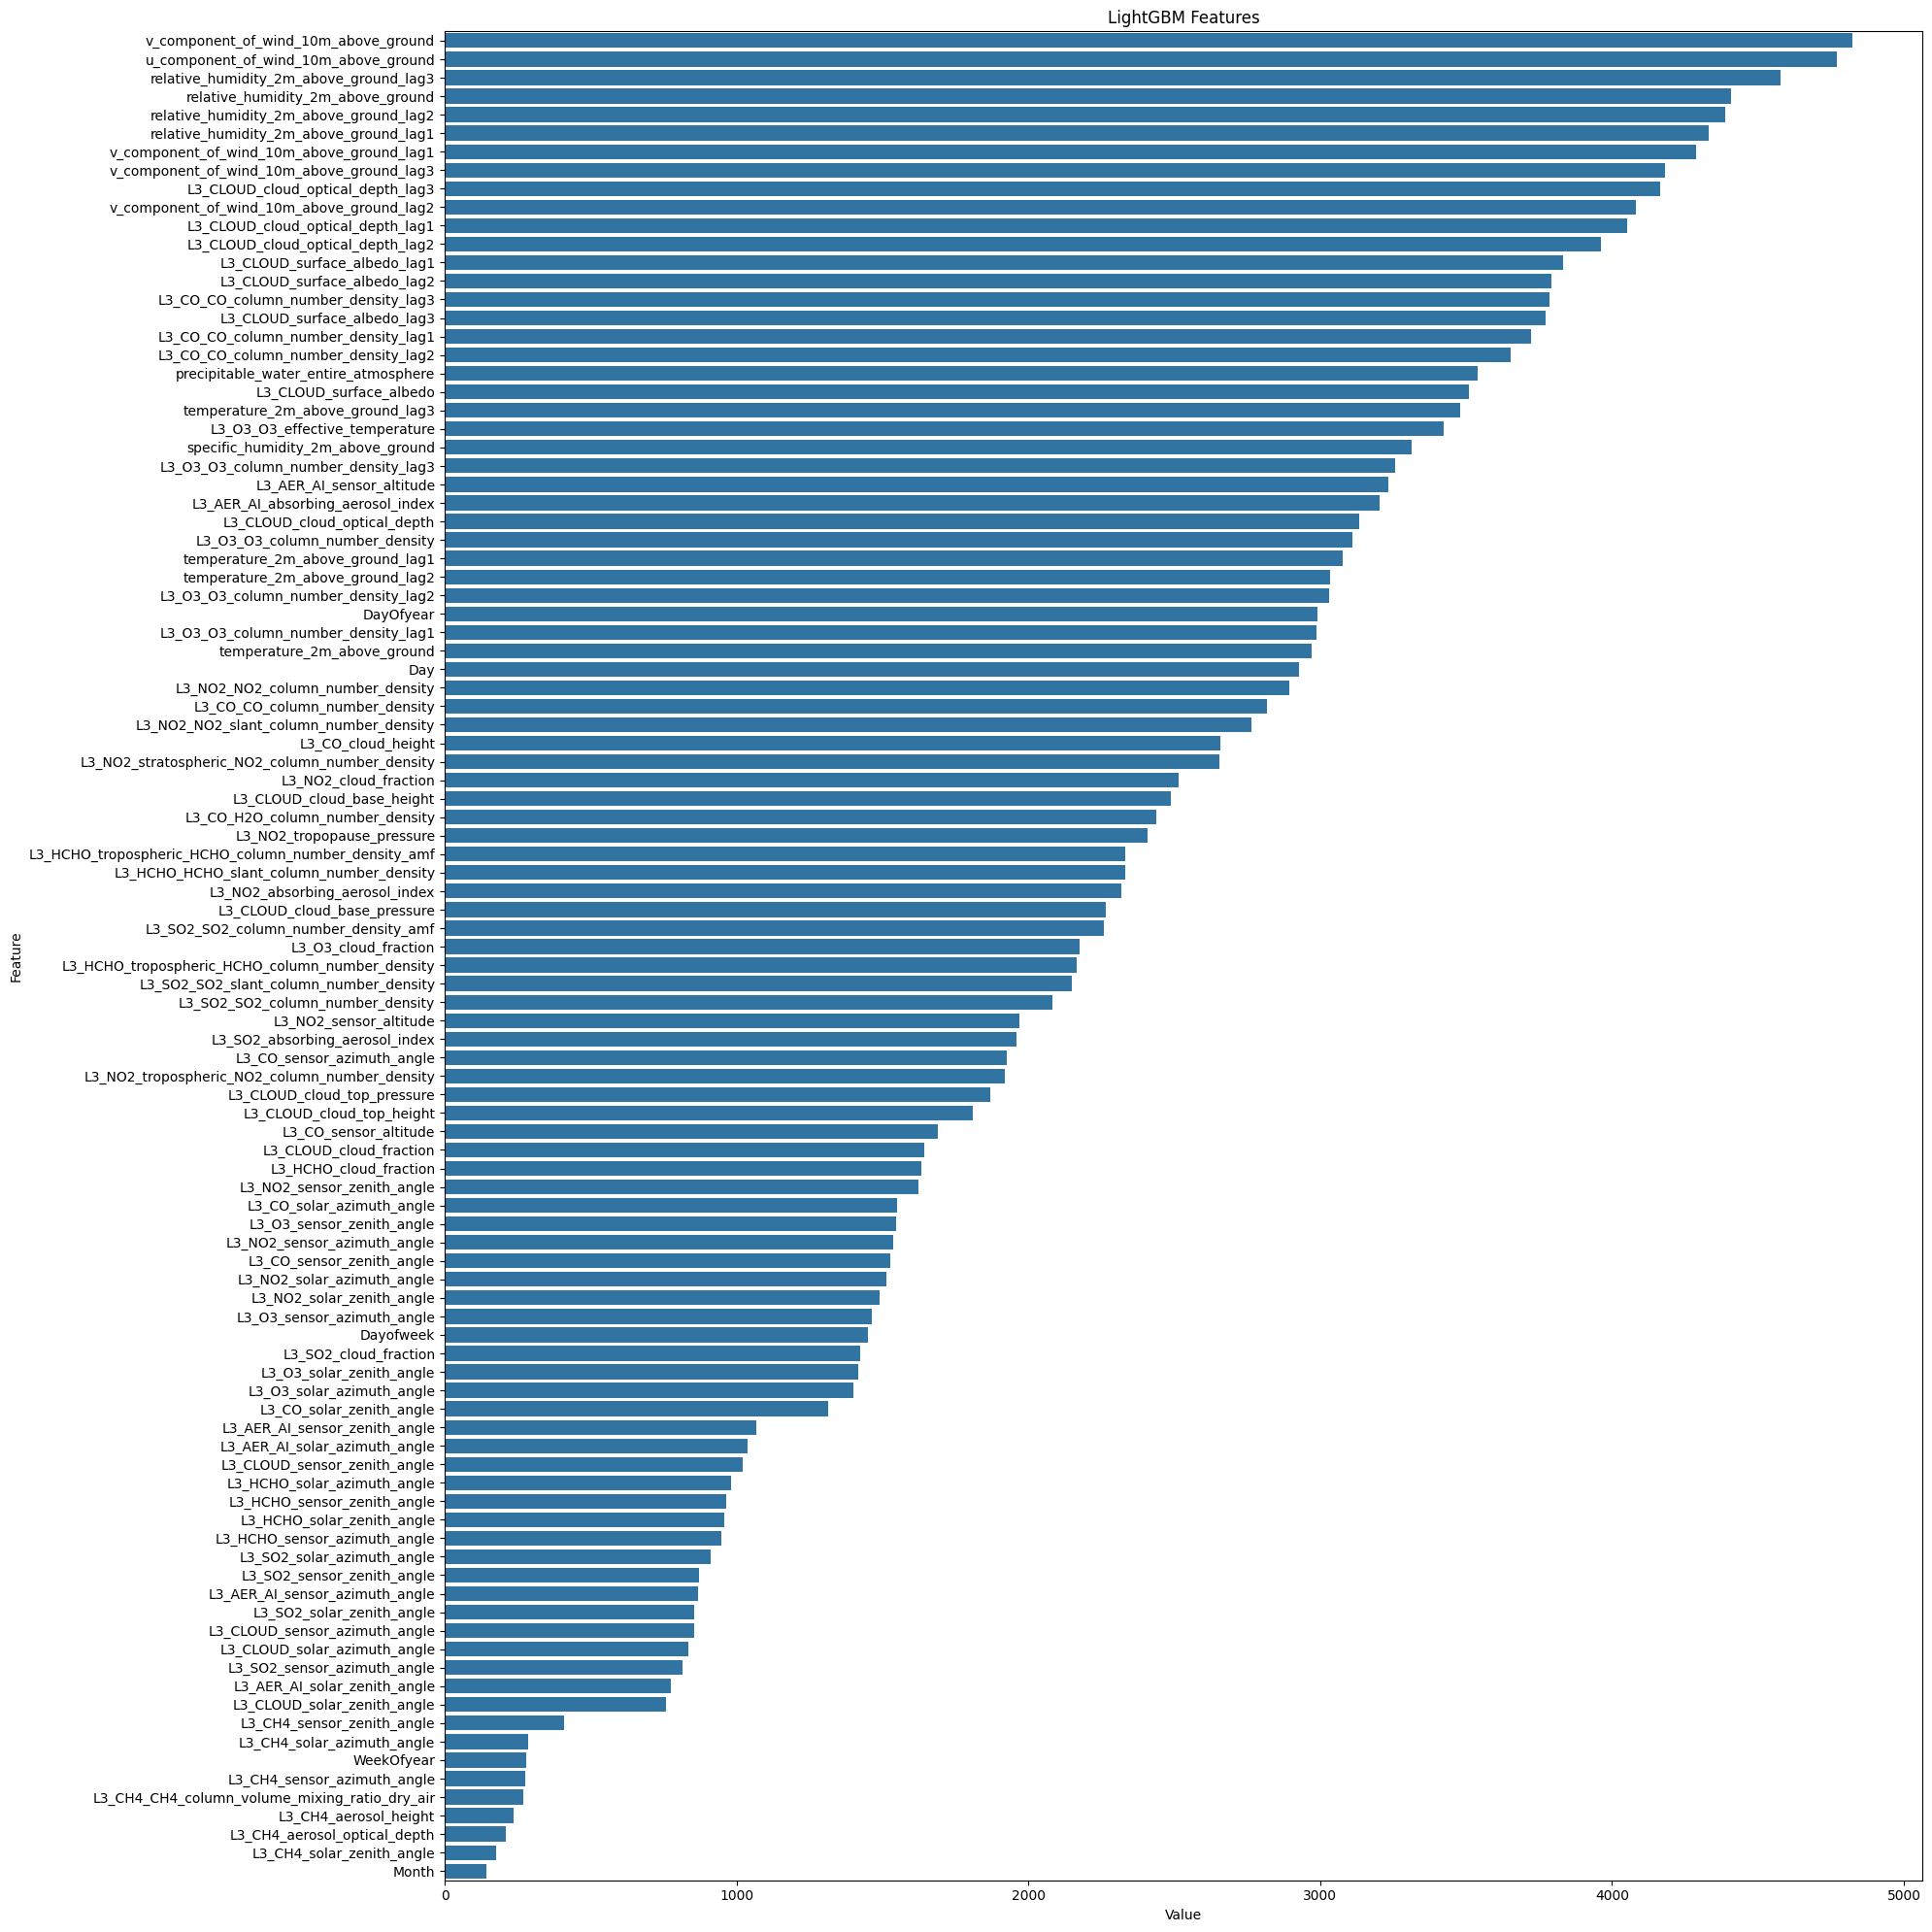

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(), X.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(20,20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test

In [ ]:
errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):

    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)

    clf = lgb.train(params=param,
                train_set=train_data,
                valid_sets=[test_data],
                # Pass the 'early_stopping_rounds' argument within the lgb.callback.early_stopping() callback
                callbacks=[lgb.callback.early_stopping(stopping_rounds=200),
                           lgb.log_evaluation(500)])  # Early stopping after 200 rounds without improvement

    y_pred = clf.predict(X_test)

    print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

    errlgb.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    p = clf.predict(Xtest)

    y_pred_totlgb.append(p)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24379
[LightGBM] [Info] Number of data points in the train set: 27501, number of used features: 100
[LightGBM] [Info] Start training from score 61.170717
Training until validation scores don't improve for 200 rounds
[500]	valid_0's rmse: 25.3306
[1000]	valid_0's rmse: 24.3009
[1500]	valid_0's rmse: 23.8855
[2000]	valid_0's rmse: 23.6634
[2500]	valid_0's rmse: 23.509
[3000]	valid_0's rmse: 23.4069
[3500]	valid_0's rmse: 23.3502
[4000]	valid_0's rmse: 23.3004
[4500]	valid_0's rmse: 23.2643
[5000]	valid_0's rmse: 23.2419
[5500]	valid_0's rmse: 23.2143
[6000]	valid_0's rmse: 23.1887
[6500]	valid_0's rmse: 23.176
[7000]	valid_0's rmse: 23.1688
[7500]	valid_0's rmse: 23.164
Did not meet early stopping. Best iteration is:
[7488]	valid_0's rmse: 23.1638
RMSE:  23.163847104184132
[LightGBM] [Info] Auto-choo

In [ ]:
np.mean(y_pred_totlgb,0)

array([67.72869717, 39.55208707, 37.54968798, ..., 53.27124419,
       37.56551857, 32.68446398])

In [ ]:
np.mean(errlgb, 0)

np.float64(24.564248993557193)

In [ ]:
y_pred = np.mean(y_pred_totlgb,0)

In [ ]:
sub['target'] = y_pred

In [ ]:
sub.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,67.728697
1,0OS9LVX X 2020-01-03,39.552087
2,0OS9LVX X 2020-01-04,37.549688
3,0OS9LVX X 2020-01-05,41.601520
4,0OS9LVX X 2020-01-06,30.697107


In [ ]:
sub.to_csv('Submission#fs4.csv', index=False)

# **XGBoost**

In [ ]:
!pip install xgboost
!pip install catboost

In [ ]:
import xgboost as xgb
from catboost import CatBoostRegressor, Pool

Define Parameter Grids:

Create parameter grids for each algorithm. This is crucial for optimization. The ranges should be adjusted based on your understanding of the algorithms and the problem.

In [ ]:
# XGBoost Parameters
param_xgb = {
    'objective': 'reg:squarederror',  # Regression objective
    'eval_metric': 'rmse',
    'eta': 0.05,  # Learning rate
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'nthread': -1 # Use all available threads
}

# CatBoost Parameters
param_cat = {
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'learning_rate': 0.05,
    'depth': 6,
    'l2_leaf_reg': 3,
    'random_seed': 42,
    'verbose': 500 # Print progress every 500 iterations
}

 Implement Training and Prediction Functions:

Create functions to train and predict using each algorithm within the K-fold cross-validation loop. This promotes code reusability.

In [ ]:
def train_xgboost(X_train, y_train, X_test, y_test, param):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_test, label=y_test)

    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

    model = xgb.train(param, dtrain, num_boost_round=7500,
                      evals=watchlist, early_stopping_rounds=200, verbose_eval=500)

    return model

def predict_xgboost(model, X):
    dtest = xgb.DMatrix(X)
    return model.predict(dtest)

def train_catboost(X_train, y_train, X_test, y_test, param):
    train_pool = Pool(X_train, y_train)
    valid_pool = Pool(X_test, y_test)

    model = CatBoostRegressor(**param)
    model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=200, verbose=500)
    return model

def predict_catboost(model, X):
    return model.predict(X)

 Modify the K-Fold Cross-Validation Loop:

Adapt the existing K-Fold loop to train and predict using XGBoost and CatBoost. I'll include code for all three models, and you can comment out the ones you don't want to use.

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor, Pool

# Assuming X and y are already defined

errlgb = []
errxgb = []
errcat = []

y_pred_totlgb = []
y_pred_totxgb = []
y_pred_totcat = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    # Use integer-based indexing for NumPy arrays
    y_train, y_test = y[train_index], y[test_index]

    # LightGBM
    train_data_lgb = lgb.Dataset(X_train, label=y_train)
    test_data_lgb = lgb.Dataset(X_test, label=y_test)
    clf = lgb.train(params=param,
                train_set=train_data_lgb,
                valid_sets=[test_data_lgb],
                callbacks=[lgb.callback.early_stopping(stopping_rounds=200),
                           lgb.log_evaluation(500)])  # Early stopping after 200 rounds without improvement

    y_pred_lgb = clf.predict(X_test)
    errlgb.append(np.sqrt(mean_squared_error(y_test, y_pred_lgb)))
    y_pred_totlgb.append(clf.predict(Xtest))

    # XGBoost
    xgb_model = train_xgboost(X_train, y_train, X_test, y_test, param_xgb)
    y_pred_xgb = predict_xgboost(xgb_model, X_test)
    errxgb.append(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
    y_pred_totxgb.append(predict_xgboost(xgb_model, Xtest))

    # CatBoost
    cat_model = train_catboost(X_train, y_train, X_test, y_test, param_cat)
    y_pred_cat = predict_catboost(cat_model, X_test)
    errcat.append(np.sqrt(mean_squared_error(y_test, y_pred_cat)))
    y_pred_totcat.append(predict_catboost(cat_model, Xtest))

    print(f"Fold RMSE: LGB: {errlgb[-1]:.4f}, XGB: {errxgb[-1]:.4f}, CAT: {errcat[-1]:.4f}")

print(f"Mean RMSE: LGB: {np.mean(errlgb):.4f}, XGB: {np.mean(errxgb):.4f}, CAT: {np.mean(errcat):.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24379
[LightGBM] [Info] Number of data points in the train set: 27501, number of used features: 100
[LightGBM] [Info] Start training from score 61.170717
Training until validation scores don't improve for 200 rounds
[500]	valid_0's rmse: 25.3306
[1000]	valid_0's rmse: 24.3009
[1500]	valid_0's rmse: 23.8855
[2000]	valid_0's rmse: 23.6634
[2500]	valid_0's rmse: 23.509
[3000]	valid_0's rmse: 23.4069
[3500]	valid_0's rmse: 23.3502
[4000]	valid_0's rmse: 23.3004
[4500]	valid_0's rmse: 23.2643
[5000]	valid_0's rmse: 23.2419
[5500]	valid_0's rmse: 23.2143
[6000]	valid_0's rmse: 23.1887
[6500]	valid_0's rmse: 23.176
[7000]	valid_0's rmse: 23.1688
[7500]	valid_0's rmse: 23.164
Did not meet early stopping. Best iteration is:
[7488]	valid_0's rmse: 23.1638
[0]	train-rmse:45.96898	eval-rmse:45.60333
[500]	trai

Ensemble the Predictions (Optional):

You can create an ensemble by averaging the predictions from all three models (or a subset of them).

In [ ]:
y_pred_lgb = np.mean(y_pred_totlgb, 0)
y_pred_xgb = np.mean(y_pred_totxgb, 0)
y_pred_cat = np.mean(y_pred_totcat, 0)

# Simple Averaging Ensemble
y_pred = (y_pred_lgb + y_pred_xgb + y_pred_cat) / 3  # Adjust weights as needed

Create Submission File:

Use the ensembled predictions (or the predictions from the best-performing individual model) to create your submission file.

In [ ]:
sub['target'] = y_pred
sub.to_csv('Submission#fs5.csv', index=False)

## CatBoost

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


# Replace with your actual target column

In [ ]:
TARGET = "target"

# Features and target

In [ ]:
# Features and target
X = train.drop(columns=[TARGET])
y = train[TARGET]

In [ ]:
# Remove the 'Place_ID X Date', 'Date', and 'Place_ID' columns from X and test DataFrames
# These columns were already dropped from the test set in a previous step.
# Re-create X by dropping the TARGET and the target-related columns directly from train
X = train.drop(columns=[TARGET, 'Place_ID X Date', 'Date', 'Place_ID', 'target_min', 'target_max', 'target_variance', 'target_count'])

# The test DataFrame 'test' already has these columns removed from previous steps.
# We just need to ensure the test set has the same columns as the training set X.
# Explicitly select columns in test that are also in X.
# This handles potential discrepancies if test had extra non-feature columns not in X.
# Also, ensure the order is the same.
X_test = test[X.columns]

y = train[TARGET]

# --- Add this check before training CatBoost ---
print("Data types of X before CatBoost training:")
print(X.dtypes)
print("\nColumns in X:")
print(X.columns.tolist())
print("\nColumns in X_test:")
print(X_test.columns.tolist())
# --- End of added check ---

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost
model = CatBoostRegressor(verbose=100, random_state=42)
# Ensure categorical features are handled if any are present after drops
# CatBoost can infer categorical features, but explicit casting to 'category' dtype is safer
# You can add this block if you suspect categorical columns might be an issue later,
# but it's not directly related to the KeyError.
# for col in X.columns:
#     if X[col].dtype == 'object': # Or check for specific categorical columns
#         X[col] = X[col].astype('category')
# for col in X_test.columns:
#     if X_test[col].dtype == 'object':
#         X_test[col] = X_test[col].astype('category')


model.fit(X_train, y_train, eval_set=(X_val, y_val))

Data types of X before CatBoost training:
precipitable_water_entire_atmosphere                   float64
relative_humidity_2m_above_ground                      float64
specific_humidity_2m_above_ground                      float64
temperature_2m_above_ground                            float64
u_component_of_wind_10m_above_ground                   float64
v_component_of_wind_10m_above_ground                   float64
L3_NO2_NO2_column_number_density                       float64
L3_NO2_NO2_slant_column_number_density                 float64
L3_NO2_absorbing_aerosol_index                         float64
L3_NO2_cloud_fraction                                  float64
L3_NO2_sensor_altitude                                 float64
L3_NO2_sensor_azimuth_angle                            float64
L3_NO2_sensor_zenith_angle                             float64
L3_NO2_solar_azimuth_angle                             float64
L3_NO2_solar_zenith_angle                              float64
L3_NO2_strato

In [ ]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Ensure test set has the same columns
X_test = test[X.columns]

# --- Add this check before training CatBoost ---
print("Data types of X before CatBoost training:")
print(X.dtypes)
# --- End of added check ---

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost
model = CatBoostRegressor(verbose=100, random_state=42)
model.fit(X_train, y_train, eval_set=(X_val, y_val))

Data types of X before CatBoost training:
precipitable_water_entire_atmosphere                   float64
relative_humidity_2m_above_ground                      float64
specific_humidity_2m_above_ground                      float64
temperature_2m_above_ground                            float64
u_component_of_wind_10m_above_ground                   float64
v_component_of_wind_10m_above_ground                   float64
L3_NO2_NO2_column_number_density                       float64
L3_NO2_NO2_slant_column_number_density                 float64
L3_NO2_absorbing_aerosol_index                         float64
L3_NO2_cloud_fraction                                  float64
L3_NO2_sensor_altitude                                 float64
L3_NO2_sensor_azimuth_angle                            float64
L3_NO2_sensor_zenith_angle                             float64
L3_NO2_solar_azimuth_angle                             float64
L3_NO2_solar_zenith_angle                              float64
L3_NO2_strato

In [ ]:
# Evaluate
val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 28.9349


In [ ]:
# Predict on test data
test_preds = model.predict(X_test)

In [ ]:
# Prepare submission
sub[TARGET] = test_preds
sub.to_csv("catboost_submission.csv", index=False)
print("Submission saved as 'catboost_submission.csv'")

Submission saved as 'catboost_submission.csv'
